## Nearest neighbor classifier for overlapping classes

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to load data from a space-separated text file
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Selects first two columns as features
    y = data[:, 2]   # Selects third column as labels
    return X, y

# Load train, validation, and test data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt')
X_val, y_val = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_val.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_test.txt')

# Create and fit the Nearest Neighbor classifier
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = nn.predict(X_val)
y_test_pred = nn.predict(X_test)

# Evaluate and print accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Validation Accuracy: 86.67%
Test Accuracy: 86.25%


## Plotting the results

#### Decision region plot for all the classes together with the training data superposed 

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\954919586.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[y_train == cls, 0], X_train[y_train == cls, 1],


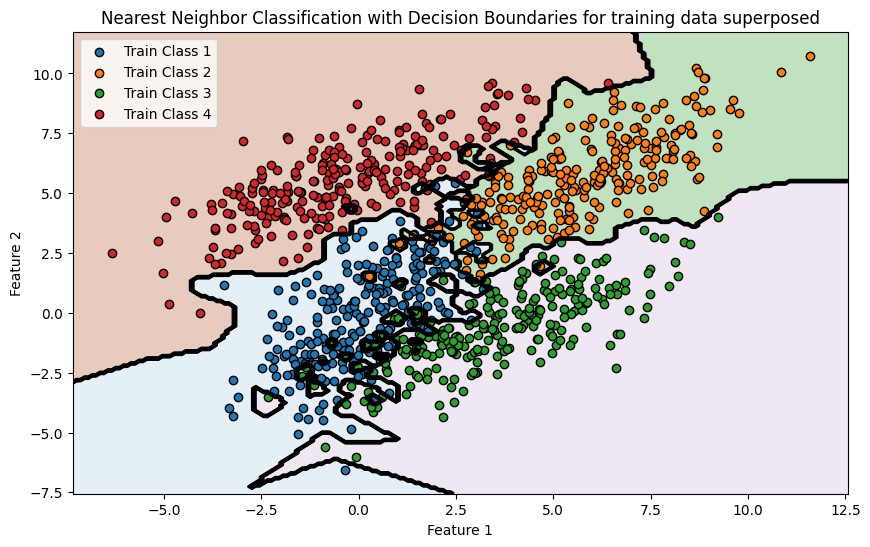

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
# Define unique classes
classes = np.unique(y_train) 

# Define the grid for plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on each point in the meshgrid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors='k', linewidths=2)

# Plot training points with class labels in legend
for cls in classes:
    plt.scatter(X_train[y_train == cls, 0], X_train[y_train == cls, 1], 
                label=f'Train Class {int(cls)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)

# Plot test points with predicted labels
#plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, marker='x', edgecolor='b', cmap=plt.cm.Paired, label="Test Data (Predicted)")

# Label and show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Nearest Neighbor Classification with Decision Boundaries for training data superposed")
plt.legend()
plt.show()

#### Decision region plot for all the classes together with the test data superposed 

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\709763177.py:22: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test_pred == cls, 0], X_test[y_test_pred == cls, 1],
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\709763177.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[y_test_pred == cls, 0], X_test[y_test_pred == cls, 1],


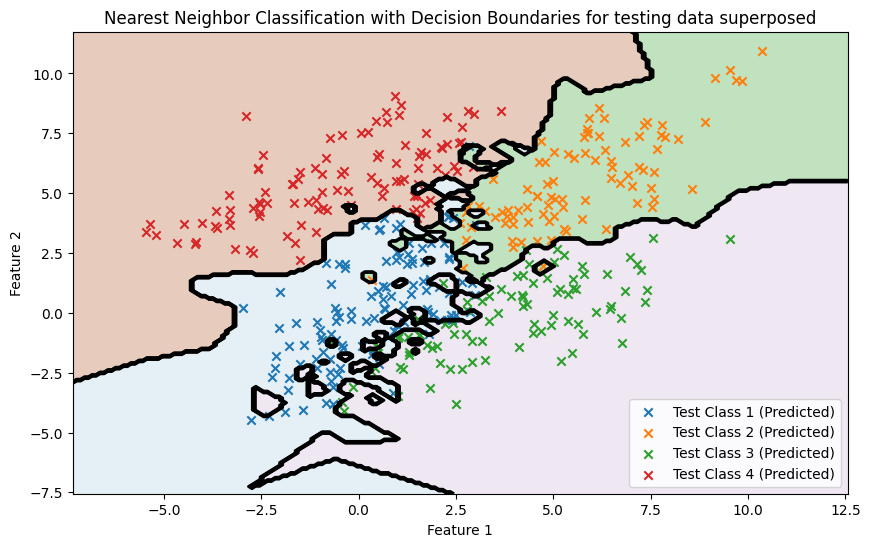

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
# Define unique classes
classes = np.unique(y_train) 

# Define the grid for plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on each point in the meshgrid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors='k', linewidths=2)

# Plot test points with predicted labels in legend
for cls in classes:
    plt.scatter(X_test[y_test_pred == cls, 0], X_test[y_test_pred == cls, 1], 
                label=f'Test Class {int(cls)} (Predicted)', marker='x', edgecolor='r', cmap=plt.cm.Paired)
# Label and show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Nearest Neighbor Classification with Decision Boundaries for testing data superposed")
plt.legend()
plt.show()

#### Decision region plot for all the classes together with the training data and testing data superimposed 

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\2041448015.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[y_train == cls, 0], X_train[y_train == cls, 1],
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\2041448015.py:26: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test_pred == cls, 0], X_test[y_test_pred == cls, 1],
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\2041448015.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[y_test_pred == cls, 0], X_test[y_test_pred == cls, 1],


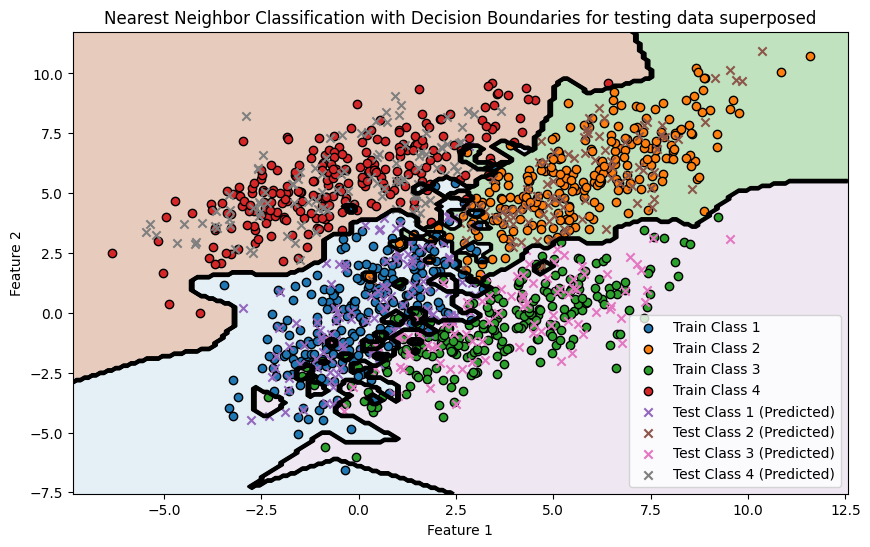

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
# Define unique classes
classes = np.unique(y_train) 

# Define the grid for plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on each point in the meshgrid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors='k', linewidths=2)
# Plot training points with class labels in legend
for cls in classes:
    plt.scatter(X_train[y_train == cls, 0], X_train[y_train == cls, 1], 
                label=f'Train Class {int(cls)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)

# Plot test points with predicted labels in legend
for cls in classes:
    plt.scatter(X_test[y_test_pred == cls, 0], X_test[y_test_pred == cls, 1], 
                label=f'Test Class {int(cls)} (Predicted)', marker='x', edgecolor='r', cmap=plt.cm.Paired)
# Label and show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Nearest Neighbor Classification with Decision Boundaries for testing data superposed")
plt.legend()
plt.show()

#### Decision region plot for every pair of classes with the respective training data superposed

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {int(class1)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cma

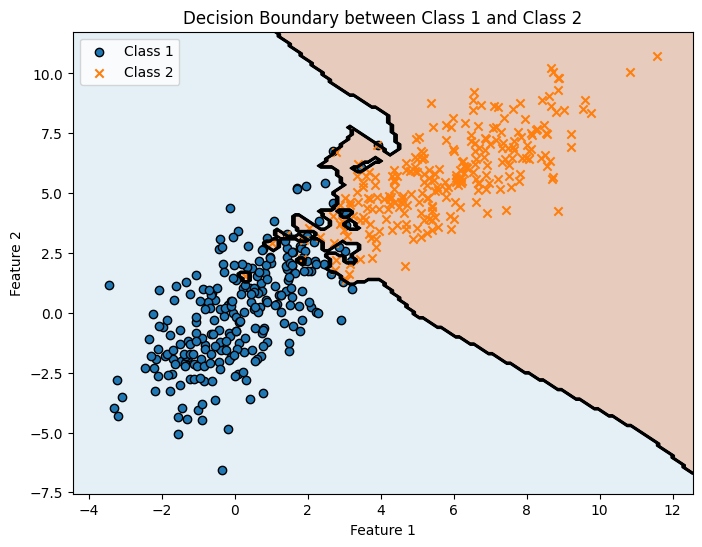

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {int(class1)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cma

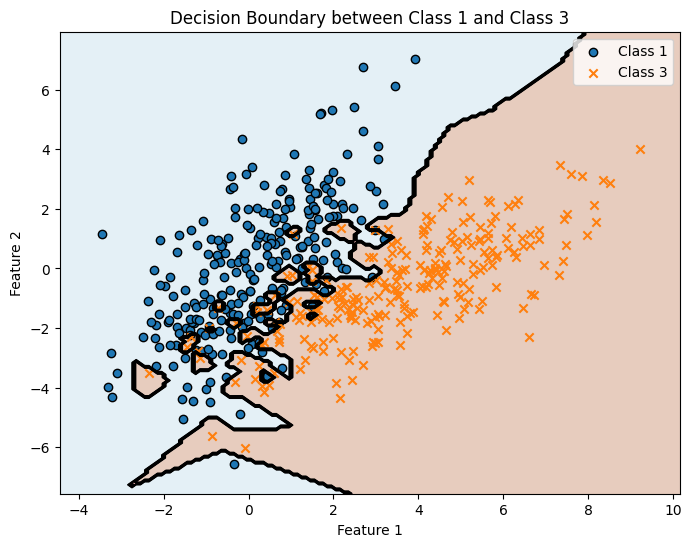

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {int(class1)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cma

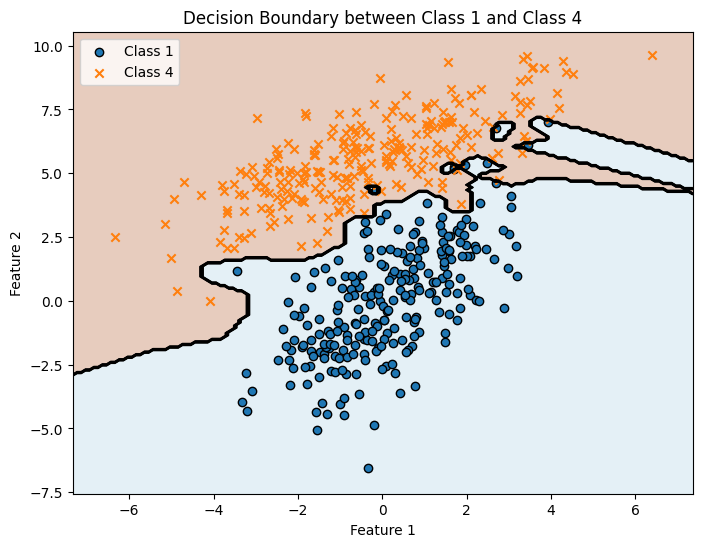

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {int(class1)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cma

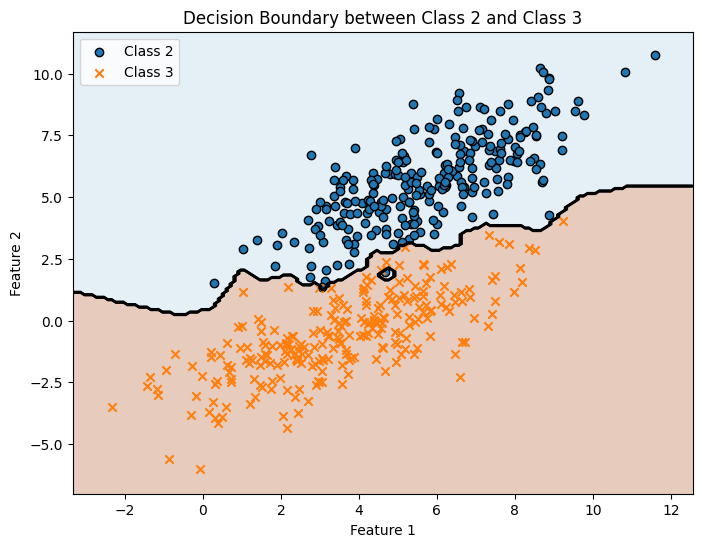

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {int(class1)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cma

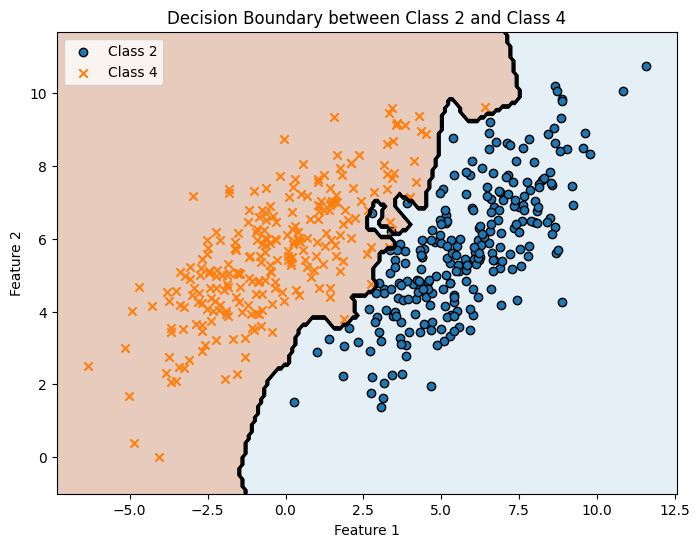

C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {int(class1)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cmap=plt.cm.Paired)
C:\Users\raksh\AppData\Local\Temp\ipykernel_9064\3477194180.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cma

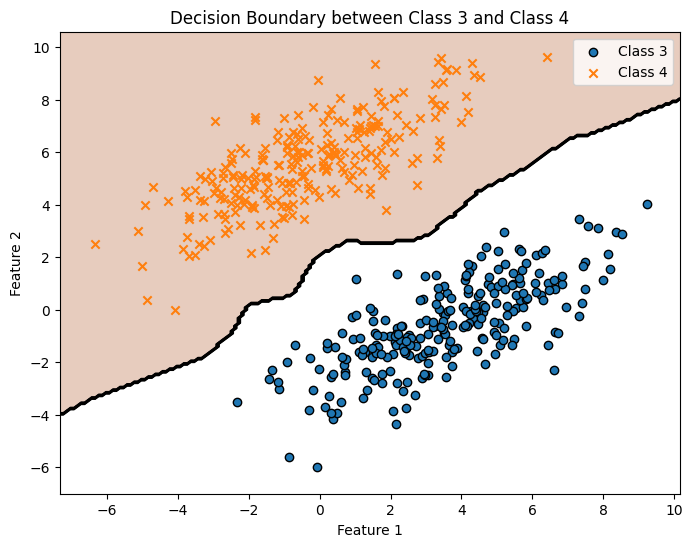

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

# Function to load data from a space-separated text file
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Selects first two columns as features
    y = data[:, 2]   # Selects third column as labels
    return X, y

# Load train data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt')

# Find unique classes and pair them
classes = np.unique(y_train)
class_pairs = list(combinations(classes, 2))

# Loop through each pair of classes
for (class1, class2) in class_pairs:
    # Filter data for the two classes
    mask = (y_train == class1) | (y_train == class2)
    X_pair, y_pair = X_train[mask], y_train[mask]
    
    # Train the KNN classifier on the filtered data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_pair, y_pair)
    
    # Set up the mesh grid for plotting decision boundaries
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict on each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, colors='k', linewidths=1)
    
    # Plot the training points for the two classes
    plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {int(class1)}', marker='o', edgecolor='k', cmap=plt.cm.Paired)
    plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {int(class2)}', marker='x', edgecolor='k', cmap=plt.cm.Paired)
    
    # Label the plot
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Boundary between Class {int(class1)} and Class {int(class2)}")
    plt.legend()
    plt.show()


### Evaluation metrics

To evaluate classification metrics like accuracy, precision, recall, and F-measure (also known as F1-score) on the test data for a multi-class classification problem, we can use sklearn.metrics functions. 

In [9]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load data from a space-separated text file
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Selects first two columns as features
    y = data[:, 2]   # Selects third column as labels
    return X, y

# Load train and test data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_test.txt')

# Train the Nearest Neighbor classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on the test set
y_test_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision_per_class = precision_score(y_test, y_test_pred, average=None)
recall_per_class = recall_score(y_test, y_test_pred, average=None)
f_measure_per_class = f1_score(y_test, y_test_pred, average=None)
mean_precision = precision_score(y_test, y_test_pred, average='macro')
mean_recall = recall_score(y_test, y_test_pred, average='macro')
mean_f_measure = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to display metrics in table format
classes = np.unique(y_test)
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F-measure': f_measure_per_class
})

# Append mean values as the last row in the table
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Class': ['Mean'],
    'Precision': [mean_precision],
    'Recall': [mean_recall],
    'F-measure': [mean_f_measure]
})], ignore_index=True)

# Display the table
print("Classification Metrics:")
print(metrics_df)
print("\nOverall Accuracy:", accuracy)


Classification Metrics:
  Class  Precision  Recall  F-measure
0   1.0   0.736842  0.8400   0.785047
1   2.0   0.933333  0.8400   0.884211
2   3.0   0.879121  0.8000   0.837696
3   4.0   0.923810  0.9700   0.946341
4  Mean   0.868276  0.8625   0.863324

Overall Accuracy: 0.8625


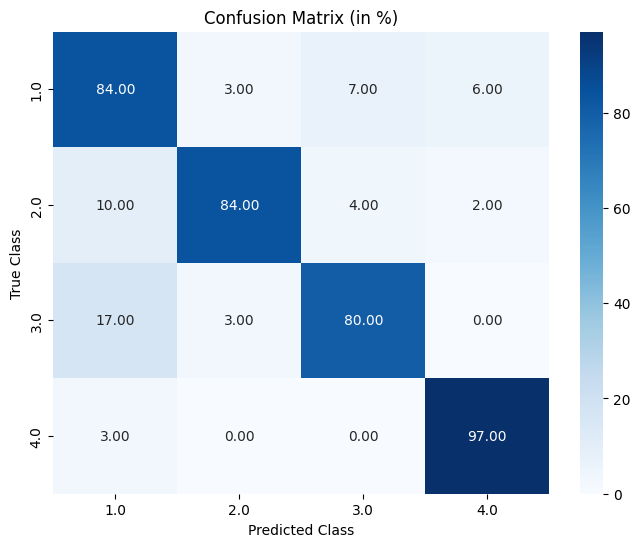

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load data from a space-separated text file
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Selects first two columns as features
    y = data[:, 2]   # Selects third column as labels
    return X, y

# Load train and test data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_test.txt')

# Train the Nearest Neighbor classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on the test set
y_test_pred = knn.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Convert to DataFrame for easy visualization
conf_matrix_df = pd.DataFrame(conf_matrix_percentage, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix (in %)")
plt.show()
